# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

html = browser.html


### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
# Create a Beautiful Soup Object
soup = soup(html, 'html.parser')
soup

<html lang="en"><head>
<meta charset="utf-8"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<meta content="" name="description"/>
<title>Mars Temperature Data</title>
<link href="css/bootstrap.min.5.2.2.css" rel="stylesheet" type="text/css"/>
<link href="css/temp.css" rel="stylesheet" type="text/css"/>
</head>
<body>
<main>
<div class="container py-4">
<header class="pb-3 mb-4 border-bottom">
<a class="d-flex align-items-center text-dark text-decoration-none" href="/">
<span class="fs-4">Mission To Mars</span>
</a>
</header>
<div class="p-5 mb-4 bg-light rounded-3">
<div class="container-fluid py-5">
<h1 class="display-5 fw-bold">Mars Temperature Data</h1>
<p class="col-md-8 fs-4">This is Mars data.</p>
<table class="table">
<tbody><tr>
<th>id</th>
<th>terrestrial_date</th>
<th>sol</th>
<th>ls</th>
<th>month</th>
<th>min_temp</th>
<th>pressure</th>
</tr>
<tr class="data-row">
<td>2</td>
<td>2012-08-16</td>
<td>10</td>
<td>155</td>
<td>6</td>
<td>-75.0</td>
<td>

In [5]:
# Extract all rows of data
table_data = soup.find('table', class_ = "table")
table_data

# Create an empty list


dataframe = []
# mars_data = {}
table_rows = table_data.find_all('tr', class_="data-row")
table_rows

# Loop through the scraped data to create a list of rows
each_row = []
for row in table_rows:
    all_data = row.find_all('td')
    id_data = all_data[0]
    terrestrial_date = all_data[1]
    sol =all_data[2]
    ls = all_data[3]
    month =all_data[4]
    min_temp =all_data[5]
    pressure =all_data[6]
    mars_data = {"ID" : id_data.text,
                 "terrestrial_date": terrestrial_date.text,
                 "sol" : sol.text,
                 "ls" : ls.text,
                 "month": month.text,
                 "min_temp" : min_temp.text,
                 "pressure": pressure.text
                 }

    dataframe.append(mars_data)

dataframe

    

   

# each_row

[{'ID': '2',
  'terrestrial_date': '2012-08-16',
  'sol': '10',
  'ls': '155',
  'month': '6',
  'min_temp': '-75.0',
  'pressure': '739.0'},
 {'ID': '13',
  'terrestrial_date': '2012-08-17',
  'sol': '11',
  'ls': '156',
  'month': '6',
  'min_temp': '-76.0',
  'pressure': '740.0'},
 {'ID': '24',
  'terrestrial_date': '2012-08-18',
  'sol': '12',
  'ls': '156',
  'month': '6',
  'min_temp': '-76.0',
  'pressure': '741.0'},
 {'ID': '35',
  'terrestrial_date': '2012-08-19',
  'sol': '13',
  'ls': '157',
  'month': '6',
  'min_temp': '-74.0',
  'pressure': '732.0'},
 {'ID': '46',
  'terrestrial_date': '2012-08-20',
  'sol': '14',
  'ls': '157',
  'month': '6',
  'min_temp': '-74.0',
  'pressure': '740.0'},
 {'ID': '57',
  'terrestrial_date': '2012-08-21',
  'sol': '15',
  'ls': '158',
  'month': '6',
  'min_temp': '-78.0',
  'pressure': '740.0'},
 {'ID': '68',
  'terrestrial_date': '2012-08-22',
  'sol': '16',
  'ls': '158',
  'month': '6',
  'min_temp': '-77.0',
  'pressure': '740.0'},


### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [6]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
df = pd.DataFrame.from_records(dataframe)



In [7]:
# Confirm DataFrame was created successfully
df.head()

,ID,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [8]:
# Examine data type of each column
df.dtypes

ID                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [9]:
# Change data types for data analysis
change_type ={ 'ID' :int,
              'sol': int,
              'ls' :int,
              'month':int,
              'min_temp' : float,
              'pressure' : float
}

df =df.astype(change_type)
df["terrestrial_date"] = pd.to_datetime(df["terrestrial_date"])



In [10]:
# Confirm type changes were successful by examining data types again
df.dtypes

ID                           int32
terrestrial_date    datetime64[ns]
sol                          int32
ls                           int32
month                        int32
min_temp                   float64
pressure                   float64
dtype: object

In [11]:
df

,ID,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


In [12]:


# month_count

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [13]:
# 1. How many months are there on Mars?
df["month"].value_counts().sort_index(ascending=True)

1     174
2     178
3     192
4     194
5     149
6     147
7     142
8     141
9     134
10    112
11    138
12    166
Name: month, dtype: int64

In [14]:
# 2. How many Martian days' worth of data are there?
df["month"].count() 

1867

In [15]:
# 3. What is the average low temperature by month?
# df_temp_month = df.groupby("month").mean("min_temp")
# df_temp_month["min_temp"]

avg_temp_monthwise = df["min_temp"].groupby(df["month"]).mean()
avg_temp_monthwise

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

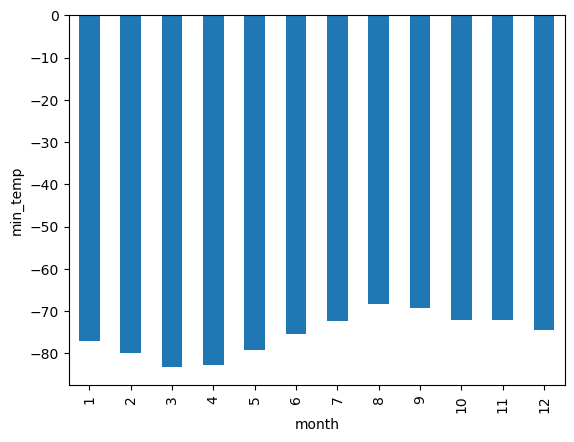

In [27]:
avg_temp_monthwise.plot(kind ="bar")
plt.ylabel('min_temp')
plt.show()

month
3    -83.307292
4    -82.747423
2    -79.932584
5    -79.308725
1    -77.160920
6    -75.299320
12   -74.451807
7    -72.281690
11   -71.985507
10   -71.982143
9    -69.171642
8    -68.382979
Name: min_temp, dtype: float64


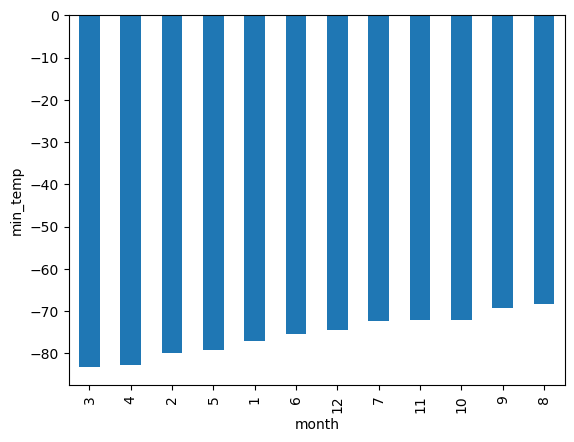

In [26]:
# Identify the coldest and hottest months in Curiosity's location

avg_temp_monthwise_min = (df["min_temp"].groupby(df["month"]).mean())
avg_temp_monthwise_min_sorted = avg_temp_monthwise_min.sort_values(ascending=True)
print(avg_temp_monthwise_min_sorted)

avg_temp_monthwise_min_sorted.plot(kind ="bar")
plt.ylabel('min_temp')
plt.show()

In [18]:
# 4. Average pressure by Martian month
avg_pressure_monthwise = df["pressure"].groupby(df["month"]).mean()
avg_pressure_monthwise

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

month
6     745.054422
5     748.557047
7     795.105634
4     806.329897
12    842.156627
11    857.014493
1     862.488506
8     873.829787
3     877.322917
10    887.312500
2     889.455056
9     913.305970
Name: pressure, dtype: float64


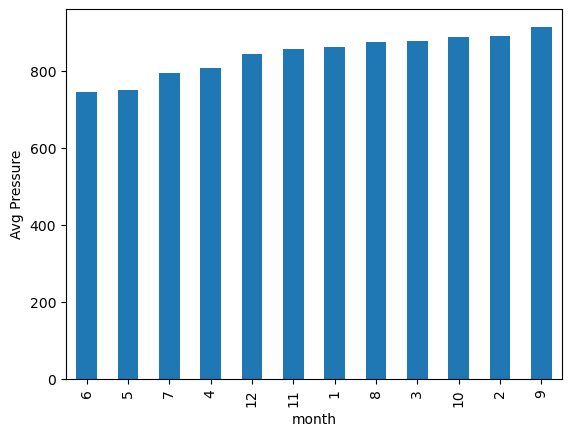

In [28]:
# Plot the average pressure by month

avg_pressure_monthwise_sorted = avg_pressure_monthwise.sort_values(ascending=True)
print(avg_pressure_monthwise_sorted)

avg_pressure_monthwise_sorted.plot(kind ="bar")
plt.ylabel("Avg Pressure")
plt.show()

In [20]:

df["min_temp"].head()

0   -75.0
1   -76.0
2   -76.0
3   -74.0
4   -74.0
Name: min_temp, dtype: float64

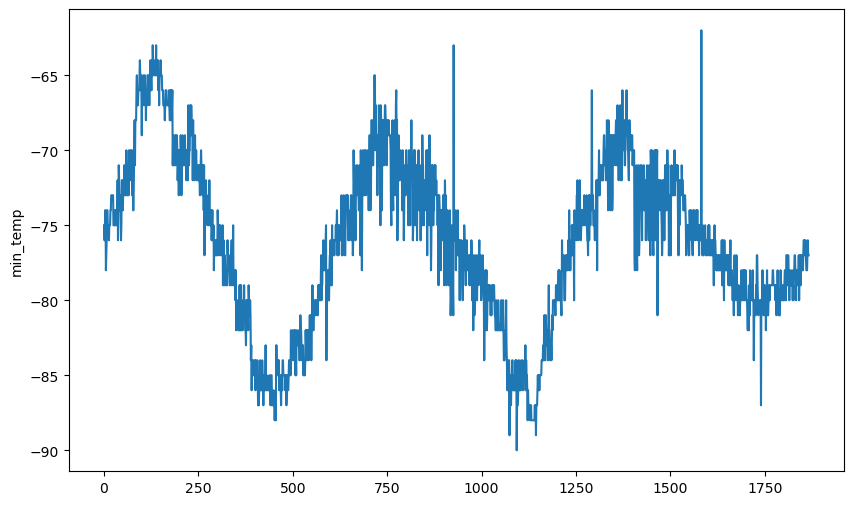

In [29]:
plt.figure(figsize=(10,6))
df["min_temp"].plot(x='month',y='min_temp')
plt.ylabel("min_temp")

plt.show()

In [22]:
df

,ID,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


In [23]:
# 5. How many terrestrial (earth) days are there in a Martian year?


#Finding when ls =0 as that is the start of the year, so "earth_days" variable tells me when ls = 0 and when the next ls will be 0. So filtering dataframe only within that df by yearwise.
earth_days = df.loc[df["ls"]== 0, :]
print(earth_days)
no_of_days_in_year_mars1 = df[(df["terrestrial_date"] >= '2013-08-01') & (df["terrestrial_date"] < "2015-06-18")]
no_of_days_in_year_mars2 = df[(df["terrestrial_date"] >= '2015-06-18') & (df["terrestrial_date"] < "2017-05-05")]
x = no_of_days_in_year_mars2["ls"].count()
y = no_of_days_in_year_mars1["ls"].count()
average_days = (x + y) /2
print(f'Aversge Earth Days in One Mars Year is' , average_days)

# earth_days_revised

        ID terrestrial_date   sol  ls  month  min_temp  pressure
304    320       2013-08-01   351   0      1     -75.0     853.0
305    319       2013-08-02   352   0      1     -77.0     854.0
925    954       2015-06-19  1019   0      1     -81.0     849.0
926    938       2015-06-20  1020   0      1     -63.0     832.0
1579  1606       2017-05-06  1688   0      1     -76.0     840.0
1580  1610       2017-05-07  1689   0      1     -75.0     840.0
Aversge Earth Days in One Mars Year is 637.0


On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

 A year on Mars appears to be about 637. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [24]:
# Write the data to a CSV
df.to_csv('Mission to Mars.csv', encoding='utf-8')

In [25]:
browser.quit()